In [ ]:
#Loading all necessary libraries
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
cifar=tf.keras.datasets.cifar10

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar.load_data()

In [ ]:
# Encoding target variables. 
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
print(x_train.shape,y_train.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 10)


In [ ]:
# Using Image Augmentation
tr = ImageDataGenerator(
    rescale=(1./255),
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
ts = ImageDataGenerator(rescale=(1./255))
tr.fit(x_train)
ts.fit(x_test)

In [ ]:
# This model was trained without encoding target variables
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding="same", input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3),padding="same", activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3),padding="same", activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3),padding="same", activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3),padding="same", activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3),padding="same", activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)       

In [ ]:
model2.compile(
    tf.keras.optimizers.Adam(beta_1=0.55, beta_2=0.999),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history2 = model2.fit(tr.flow(x_train, y_train,
                                    batch_size=10),
                                    epochs=100,
                                    validation_data=(ts.flow(x_test,y_test)),)
model2.evaluate(x_test,y_test)

Epoch 1/100
5000/5000 [==============================] - 68s 14ms/step - loss: 0.7046 - accuracy: 0.1008 - val_loss: 1.8540 - val_accuracy: 0.0561
Epoch 2/100
5000/5000 [==============================] - 68s 14ms/step - loss: 0.7026 - accuracy: 0.1022 - val_loss: 1.7181 - val_accuracy: 0.1416
Epoch 3/100
5000/5000 [==============================] - 68s 14ms/step - loss: 0.6988 - accuracy: 0.1024 - val_loss: 1.9178 - val_accuracy: 0.1806
Epoch 4/100
5000/5000 [==============================] - 68s 14ms/step - loss: 0.6848 - accuracy: 0.1011 - val_loss: 1.9978 - val_accuracy: 0.1066
Epoch 5/100
5000/5000 [==============================] - 68s 14ms/step - loss: 0.6801 - accuracy: 0.1030 - val_loss: 1.9547 - val_accuracy: 0.0606
Epoch 6/100
5000/5000 [==============================] - 67s 13ms/step - loss: 0.6712 - accuracy: 0.1015 - val_loss: 1.7814 - val_accuracy: 0.1042
Epoch 7/100
5000/5000 [==============================] - 67s 13ms/step - loss: 0.6661 - accuracy: 0.1018 - val_loss: 1

[151.23724365234375, 0.0010999999940395355]

In [ ]:
model2.evaluate(x_test,y_test)

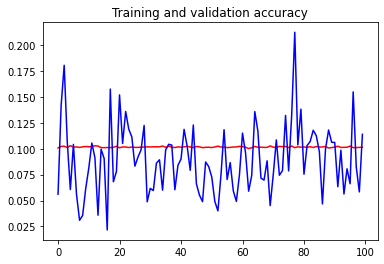

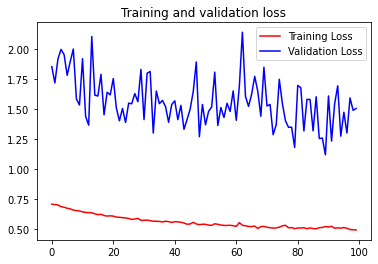

In [ ]:
acc=history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#Trying new model for same epochs and hyperparameters but encoding target variables now!!

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding="same", input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3),padding="same", activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3),padding="same", activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3),padding="same", activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3),padding="same", activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3),padding="same", activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model2.summary()
model2.compile(
    tf.keras.optimizers.Adam(beta_1=0.55, beta_2=0.999),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
history2 = model2.fit(tr.flow(x_train, y_train,
                                    batch_size=10),
                                    epochs=100,
                                    validation_data=(ts.flow(x_test,y_test)),)
model2.evaluate(x_test,y_test)

Epoch 1/100
5000/5000 [==============================] - 75s 15ms/step - loss: 1.8116 - accuracy: 0.3616 - val_loss: 2.8316 - val_accuracy: 0.2000
Epoch 2/100
5000/5000 [==============================] - 74s 15ms/step - loss: 1.4388 - accuracy: 0.4876 - val_loss: 3.3473 - val_accuracy: 0.2427
Epoch 3/100
5000/5000 [==============================] - 74s 15ms/step - loss: 1.2892 - accuracy: 0.5452 - val_loss: 3.1272 - val_accuracy: 0.2341
Epoch 4/100
5000/5000 [==============================] - 74s 15ms/step - loss: 1.1770 - accuracy: 0.5906 - val_loss: 3.6724 - val_accuracy: 0.2466
Epoch 5/100
5000/5000 [==============================] - 73s 15ms/step - loss: 1.1028 - accuracy: 0.6148 - val_loss: 3.7771 - val_accuracy: 0.2234
Epoch 6/100
5000/5000 [==============================] - 75s 15ms/step - loss: 1.0525 - accuracy: 0.6379 - val_loss: 3.7422 - val_accuracy: 0.2577
Epoch 7/100
5000/5000 [==============================] - 74s 15ms/step - loss: 1.0104 - accuracy: 0.6515 - val_loss: 3

[99.35781860351562, 0.19290000200271606]

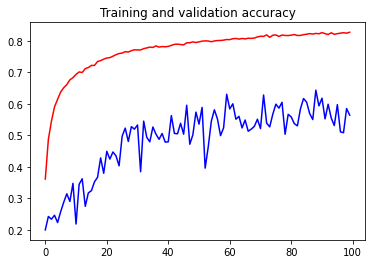

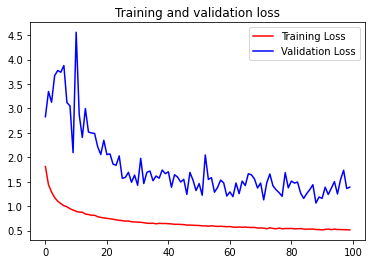

In [ ]:
acc=history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#As we can see , accurcy is increasing and loss is decreasing in both train and validation sets.

In [ ]:
#Saving the model for any in-future use.
model2.save('abg.h5')

# New Section